In [ ]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy import stats
import time
from scipy.optimize import curve_fit
from polymer_main import *

In [ ]:
seed = 201
temp = 1 #temperature in units of epsilon
polymers = 50000
beads = np.unique(np.logspace(1, 2.4, num=20, dtype='int'))
dots = len(beads)
print(beads)
print(dots)

# Results generator

In [ ]:
# Non interacting polymer, random walk
np.random.seed(seed)

start_time = time.time()
P0, R0, random = generator_rosenbluth(beads, polymers, intervals = 6, temperature = temp, interaction=False, min_dist=0)
duration = time.time() - start_time

np.savetxt(f'./Data_Record/Rw_{beads[-1]}beads{polymers}pol_{seed}', random, fmt='%.6e', delimiter='\t', 
           header=f'It took {duration} seconds\nBeads\tDistance\tError')

In [ ]:
# Interacting polymer, Rosenbluth algorith
np.random.seed(seed)

start_time = time.time()
P1, R1, rosen = generator_rosenbluth(beads, polymers, intervals = 6, temperature = temp, interaction=True, min_dist=0)
duration = time.time() - start_time

np.savetxt(f'./Data_Record/Ros_{beads[-1]}beads{polymers}pol{temp}temp_{seed}', rosen, fmt='%.6e', delimiter='\t', 
           header=f'It took {duration} seconds\nBeads\tDistance\tError')

In [ ]:
# Interacting polymer, PERM
np.random.seed(seed)

start_time = time.time()
P2, R2, perm = generator_PERM(beads, polymers, intervals = 6, temperature = temp, interaction=True, min_dist=0, ep_gap = 10)
duration = time.time() - start_time

np.savetxt(f'./Data_Record/Perm_{beads[-1]}beads{polymers}pol{temp}temp_{seed}', perm, fmt='%.6e', delimiter='\t', 
           header=f'It took {duration} seconds\nPruning and enriching each 10 beads, 5% for both\nBeads\tDistance\tError')

# Plotting

Slope  0.7234762069124254  R_value 0.9552785313690924


Text(0.5, 0, 'N')

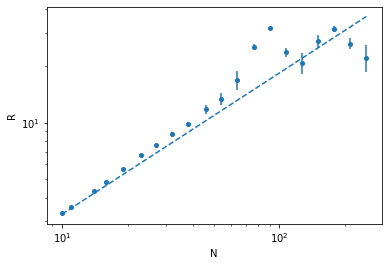

In [130]:
#Making a single plot of any method. Make sure to put the correct name of the data file.
data = np.loadtxt(f'./Data_Record/Ros_251beads50000pol1temp_201')

x = np.log(data[:,0])
y = np.log(data[:,1])

#Obtaining the slope of the generated data by linear regression. 
slope, intercept, r, p, std_err = stats.linregress(x,y)
print('Slope ', slope,' R_value', r) #The R_value helps to assess the reliability of the results.

#Fitting the theoretical dependency to the data.
prefactor = curve_fit(lambda N,a: a*N**0.75, data[:,0], data[:,1])

x0 = np.linspace(data[0,0], data[-1,0])
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], fmt='o', markersize = 4)
#plt.plot(x0, np.exp(intercept)*x0**slope, '--', color='tab:blue', label = 'linear regression')
plt.plot(x0, prefactor[0]*x0**0.75, '--', color='tab:blue', label = 'theory')

#plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('R')
plt.xlabel('N')
#plt.savefig("./Plots/Final/Perm50000_121_1.png", bbox_inches = 'tight')